In [295]:
import pandas as pd


# Data loading

In [296]:
frozenw2v = pd.read_csv('src/analysis/data/frozenw2v.csv')
from_scratch = pd.read_csv('src/analysis/data/from_scratch.csv')
fft = pd.read_csv('src/analysis/data/fft.csv')

In [297]:
# rerun_frozenw2v = pd.read_csv('src/analysis/data/frozenw2v_rerun.csv')

# id_cols = [
#     "encoder_fc_hidden_sizes",
#     "encoder_gru_hidden_size",
#     "encoder_num_gru_layers",
# ]

# rerun_frozenw2v = rerun_frozenw2v[
#     id_cols+[
#         "test_word_error_rate",
#         "test_ctc_loss",
#         "test_char_error_rate"
#     ]
# ]
# rerun_frozenw2v.columns = rerun_frozenw2v.columns.map(lambda x: f'{x}_rerun' if x not in id_cols else x)

# joined = frozenw2v.merge(
#     rerun_frozenw2v,
#     on=id_cols,
#     how="inner"
# )

# joined[[ "test_ctc_loss_rerun",'test_word_error_rate_rerun', "test_char_error_rate_rerun"]].corr()



# Metric correlation

In [298]:
frozenw2v[[ "test_ctc_loss",'test_word_error_rate', "test_char_error_rate"]].corr()

,test_ctc_loss,test_word_error_rate,test_char_error_rate
test_ctc_loss,1.000000,0.847388,0.938041
test_word_error_rate,0.847388,1.000000,0.884609
test_char_error_rate,0.938041,0.884609,1.000000


In [299]:
from_scratch[[ "test_ctc_loss_rerun",'test_word_error_rate_rerun', "test_char_error_rate_rerun"]].corr()

,test_ctc_loss_rerun,test_word_error_rate_rerun,test_char_error_rate_rerun
test_ctc_loss_rerun,1.000000,0.165106,0.539558
test_word_error_rate_rerun,0.165106,1.000000,0.799301
test_char_error_rate_rerun,0.539558,0.799301,1.000000


In [300]:
fft[[ "test_ctc_loss_rerun",'test_word_error_rate_rerun', "test_char_error_rate_rerun"]].corr()

,test_ctc_loss_rerun,test_word_error_rate_rerun,test_char_error_rate_rerun
test_ctc_loss_rerun,1.000000,-0.084841,-0.090897
test_word_error_rate_rerun,-0.084841,1.000000,0.977908
test_char_error_rate_rerun,-0.090897,0.977908,1.000000


# Experiment Setup result comparison

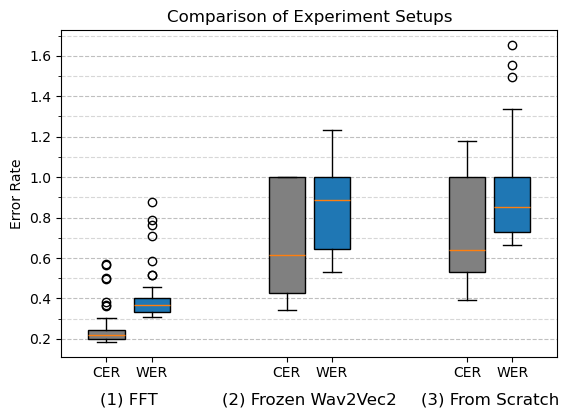

In [301]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator

data = [ fft['test_char_error_rate_rerun'],fft['test_word_error_rate'],  frozenw2v['test_char_error_rate'],frozenw2v['test_word_error_rate'],  from_scratch['test_char_error_rate_rerun'],from_scratch['test_word_error_rate'],]

# Custom positions to group the boxes
positions = [1, 1.5, 3, 3.5, 5, 5.5]

# Plotting the boxplots
fig, ax = plt.subplots()

# Create boxplots with custom positions
boxplots = ax.boxplot(data, positions=positions, widths=0.4, patch_artist=True)

# Set custom x-tick positions and labels for the metrics
ax.set_xticks([1, 1.5, 3, 3.5, 5, 5.5])
ax.set_xticklabels(['CER', 'WER', 'CER', 'WER', 'CER', 'WER'])

# Adding method labels in the center of each group of boxes
ax.text(1.25, -0.1, '(1) FFT', ha='center', va='center', fontsize=12)
ax.text(3.25, -0.1, '(2) Frozen Wav2Vec2', ha='center', va='center', fontsize=12)
ax.text(5.25, -0.1, '(3) From Scratch', ha='center', va='center', fontsize=12)

# Adjust the bottom margin to give more space for the method labels
plt.subplots_adjust(bottom=0.2)



# Set labels and title
ax.set_ylabel('Error Rate')
plt.title('Comparison of Experiment Setups')

# Color the CER boxes gray
for patch, position in zip(boxplots['boxes'], positions):
    if position in [1, 3, 5]:  # These are the CER positions
        patch.set_facecolor('gray')


ax.yaxis.set_major_locator(MultipleLocator(0.2))  # Control label spacing
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.grid(True, axis='y', linestyle='--', alpha=0.5, which="minor")
ax.grid(True, axis='y', linestyle='--', alpha=0.8, which="major")
# Show the plot
plt.show()


In [302]:
min(from_scratch['test_word_error_rate'])

0.6621045512812478

In [303]:
min(from_scratch['test_char_error_rate_rerun'])

0.3901134445775343

In [304]:
min(fft['test_word_error_rate'])

0.3097288565976279

In [305]:
min(fft['test_char_error_rate_rerun'])

0.1854675437485587

In [306]:
min(frozenw2v['test_word_error_rate'])

0.5329544246196747

In [307]:
min(frozenw2v['test_char_error_rate'])

0.3446352444260254

In [308]:
fft[fft['test_word_error_rate'] <= min(frozenw2v['test_word_error_rate'])].shape[0]

40

In [309]:
frozenw2v[frozenw2v['test_word_error_rate'] < min(from_scratch['test_word_error_rate'])].shape[0]

13

In [310]:
# count of the number of times the test_word_error_rate is more or equal to 1.0
fft[fft['test_char_error_rate_rerun'] >= 1.0].shape[0]

0

In [311]:
fft['test_char_error_rate_rerun'].max()

0.5696846987526303

In [312]:
frozenw2v[frozenw2v['test_char_error_rate'] >= 1.0].shape[0]

14

In [313]:
from_scratch[from_scratch['test_char_error_rate_rerun'] >= 1.0].shape[0]

13

# Metrics for each brain encoder architecture

In [314]:
# Join withcheckpoint, frozenw2v and nocheckpoint dataframes on encoder_fc_hidden_sizes, encoder_gru_hidden_size, encoder_num_gru_layers and only keep the respective test_word_error_rate columns
id_cols = [
    "encoder_fc_hidden_sizes",
    "encoder_gru_hidden_size",
    "encoder_num_gru_layers",
]
fft = fft[
    id_cols
    + [
        "test_word_error_rate",
        "test_ctc_loss",
        "test_char_error_rate_rerun",
        "test_word_error_rate_rerun",
    ]
]
fft.columns = fft.columns.map(lambda x: f"{x}_fft" if x not in id_cols else x)

frozenw2v = frozenw2v[
    id_cols
    + [
        "test_word_error_rate",
        "test_ctc_loss",
        "test_char_error_rate"
    ]
]
frozenw2v.columns = frozenw2v.columns.map(
    lambda x: f"{x}_frozenw2v" if x not in id_cols else x
)

from_scratch = from_scratch[
    id_cols
    + [
        "test_word_error_rate",
        "test_ctc_loss",
        "test_char_error_rate_rerun",
        "test_word_error_rate_rerun",
    ]
]
from_scratch.columns = from_scratch.columns.map(
    lambda x: f"{x}_fromscratch" if x not in id_cols else x
)

joined = fft.merge(
    frozenw2v,
    on=id_cols,
    how="inner",
).merge(
    from_scratch,
    on=id_cols,
    how="inner",
)
joined

,encoder_fc_hidden_sizes,encoder_gru_hidden_size,encoder_num_gru_layers,test_word_error_rate_fft,test_ctc_loss_fft,test_char_error_rate_rerun_fft,test_word_error_rate_rerun_fft,test_word_error_rate_frozenw2v,test_ctc_loss_frozenw2v,test_char_error_rate_frozenw2v,test_word_error_rate_fromscratch,test_ctc_loss_fromscratch,test_char_error_rate_rerun_fromscratch,test_word_error_rate_rerun_fromscratch
0,[],512,5,0.309729,0.858086,0.185468,0.309729,1.000000,3.073612,1.000000,0.689070,1.174896,0.587080,0.689070
1,[128],512,3,0.316050,0.870336,0.188326,0.316050,0.946451,2.580762,0.649193,0.678854,1.184850,0.504460,0.678677
2,[],512,3,0.317374,0.846148,0.185682,0.317194,0.601270,1.620351,0.388215,0.731965,1.181851,0.565646,0.732141
3,"[512, 128]",512,3,0.324505,0.837600,0.192533,0.324683,0.688888,1.846997,0.449670,1.000000,2.973893,1.000000,1.000000
4,[],256,3,0.324786,0.861521,0.192041,0.324786,0.646741,1.812266,0.429451,0.932493,1.210070,0.593976,0.932316
5,[256],256,5,0.325922,0.883484,0.194136,0.325922,1.000000,3.112095,1.000000,1.000000,2.974602,1.000000,1.000000
6,[512],512,3,0.327590,0.866803,0.195644,0.327590,0.575668,1.562706,0.373818,0.701255,1.189160,0.533676,0.701072
7,[512],512,5,0.332024,0.907911,0.198762,0.332083,1.000000,3.006294,1.000000,0.697905,1.171141,0.523298,0.697905
8,[256],1024,5,0.333749,0.889972,0.203451,0.333749,1.233944,2.571779,0.726150,1.052064,1.075840,0.673473,1.052064
9,[512],256,3,0.334846,0.910820,0.195401,0.334846,0.750355,2.059877,0.507159,0.887198,1.230712,0.540085,0.887198


### Full Fine Tuning vs all others 

In [315]:
# Count how many rows test_word_error_rate_fft is lower than the other two test_word_error_rate columns
sum((joined["test_word_error_rate_fft"] < joined["test_word_error_rate_frozenw2v"])*( joined["test_word_error_rate_fft"] < joined["test_word_error_rate_fromscratch"]) )


44

### Frozen W2V vs all others

In [316]:
sum((joined["test_word_error_rate_frozenw2v"] < joined["test_word_error_rate_fft"])*( joined["test_word_error_rate_frozenw2v"] < joined["test_word_error_rate_fromscratch"]) )

0

### No Checkpoint vs all others

In [317]:
sum((joined["test_word_error_rate_fromscratch"] < joined["test_word_error_rate_fft"])*( joined["test_word_error_rate_fromscratch"] < joined["test_word_error_rate_frozenw2v"]) )

1

In [318]:
joined["test_word_error_rate_fromscratch"] < joined["test_word_error_rate_fft"]

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44     True
dtype: bool

In [319]:
joined["test_word_error_rate_fft"].max()

0.8746967102800097

In [320]:
joined[44:45]

,encoder_fc_hidden_sizes,encoder_gru_hidden_size,encoder_num_gru_layers,test_word_error_rate_fft,test_ctc_loss_fft,test_char_error_rate_rerun_fft,test_word_error_rate_rerun_fft,test_word_error_rate_frozenw2v,test_ctc_loss_frozenw2v,test_char_error_rate_frozenw2v,test_word_error_rate_fromscratch,test_ctc_loss_fromscratch,test_char_error_rate_rerun_fromscratch,test_word_error_rate_rerun_fromscratch
44,[],1024,3,0.874697,0.872131,0.49953,0.874697,1.0,3.075439,1.0,0.69313,1.152352,0.65273,0.69313


### Frozen vs no checkpoint

In [330]:
sum((joined["test_char_error_rate_frozenw2v"]<1.0))

31

In [331]:
sum((joined["test_char_error_rate_frozenw2v"]<1.0)*( joined["test_word_error_rate_frozenw2v"] < joined["test_word_error_rate_fromscratch"]) )

25

In [323]:
# Perform Wilcoxon signed-rank test between test_word_error_rate_fft and test_word_error_rate_frozen + test_word_error_rate
from scipy.stats import wilcoxon
wilcoxon(joined["test_word_error_rate_fft"], joined["test_word_error_rate_fromscratch"] , alternative="less")#+ joined["test_word_error_rate"]


WilcoxonResult(statistic=2.0, pvalue=8.526512829121202e-14)

In [324]:
wilcoxon(joined["test_word_error_rate_fft"], joined["test_word_error_rate_frozenw2v"] , alternative="less")

WilcoxonResult(statistic=0.0, pvalue=2.842170943040401e-14)

In [325]:
import json
import os

def get_dirs_from_slurm_output(file: str):
    dirs = []
    with open(file) as f:
        while True:
            line = f.readline()
            if not line:
                break
            if "Done. Saved results to " in line:
                dirs.append(line.replace("Done. Saved results to ", "").replace("\n", ""))
    return dirs

def adjust_cmd(cmd: str, exp_name: str, checkpoint_dir:str):
    cmd = cmd.replace("--epochs=100", "--epochs=0")
    cmd = cmd.replace("--return_best_model=true", "--return_best_model=false")
    cmd += f" --experiment_name={exp_name}"
    cmd += f" --results_subdir_name={exp_name}"
    cmd += f" --from_checkpoint={os.path.join(checkpoint_dir, 'model.pt')}"
    return cmd

def get_adjusted_repro_cmds(slurm_outs: list[str], new_exp_name: str):
    dirs = []
    for out in slurm_outs:
        dirs += get_dirs_from_slurm_output(out)
    original_repros = [(json.load(open(os.path.join(dir, "config.json")))["repro_cmd"], dir) for dir in dirs]
    adjusted_repros = [adjust_cmd(cmd, new_exp_name, dir) for cmd, dir in original_repros]
    return adjusted_repros

print("srun "+"\nsrun ".join(get_adjusted_repro_cmds(["/hpi/fs00/home/tobias.fiedler/brain2text/slurm-1183623.out"], "rerun_fft")))

srun python run.py --encoder_fc_hidden_sizes=[] --encoder_gru_hidden_size=256 --encoder_num_gru_layers=1 --use_wandb=true --experiment_type=b2p2t_gru+w2v --loss_function=ctc --early_stopping_patience=10 --epochs=0 --batch_size=64 --learning_rate=0.0001 --return_best_model=false --encoder_learnable_inital_state=false --unfreeze_strategy=brain_encoder+w2v --weight_decay=0.0001 --encoder_dropout=0.45 --gaussian_smooth_width=1.5 --w2v_learning_rate=0.00001 --w2v_warmup_steps=3 --w2v_warmup_start_step=7 --whiteNoiseSD=0.02 --constantOffsetSD=0.25 --w2v_skip_loading_weights=false --experiment_name=rerun_fft --results_subdir_name=rerun_fft --from_checkpoint=/hpi/fs00/scratch/tobias.fiedler/brain2text/experiment_results/b2p2t_gru+w2v/2024-08-16_12#53#09/model.pt
srun python run.py --encoder_fc_hidden_sizes=[] --encoder_gru_hidden_size=256 --encoder_num_gru_layers=3 --use_wandb=true --experiment_type=b2p2t_gru+w2v --loss_function=ctc --early_stopping_patience=10 --epochs=0 --batch_size=64 --lea

In [326]:
from math import e
import numpy as np
from typing import NamedTuple, Any
class Series(NamedTuple):
    x: list[float]|Any
    y: list[float]|Any
    label: str
    color: str

def scatter_multiple_w_regression(
    data:list[Series],title: str = "", xlabel: str = "", ylabel: str = ""
):
    for x,y, label,color in data:
        plt.scatter(
            x,
            y,
            c=color,
            alpha=0.4,
            label=label
        )
        try: 
            z = np.polyfit(x, y, 1)
            p = np.poly1d(z)
            plt.plot(
                x, p(x), f"r--", c=color
            )
        except Exception as e:
            print("Could not plot regression line for",label, e)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.title(title)
    plt.show()

/tmp/ipykernel_2486665/2314183445.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(


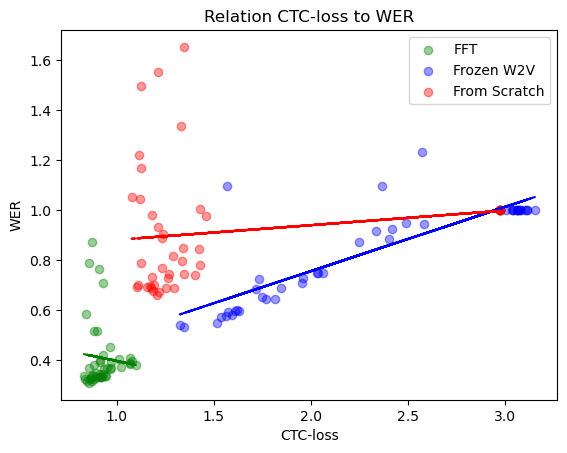

In [327]:
scatter_multiple_w_regression(
    [
        Series(
            joined["test_ctc_loss_fft"],
            joined["test_word_error_rate_fft"],
            "FFT",
            "green",
        ),
        Series(
            joined["test_ctc_loss_frozenw2v"],
            joined["test_word_error_rate_frozenw2v"],
            "Frozen W2V",
            "blue",
        ),
        Series(
            joined["test_ctc_loss_fromscratch"],
            joined["test_word_error_rate_fromscratch"],
            "From Scratch",
            "red",
        )
    ],
    "Relation CTC-loss to WER",
    "CTC-loss",
    "WER",
)

/tmp/ipykernel_2486665/2314183445.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(


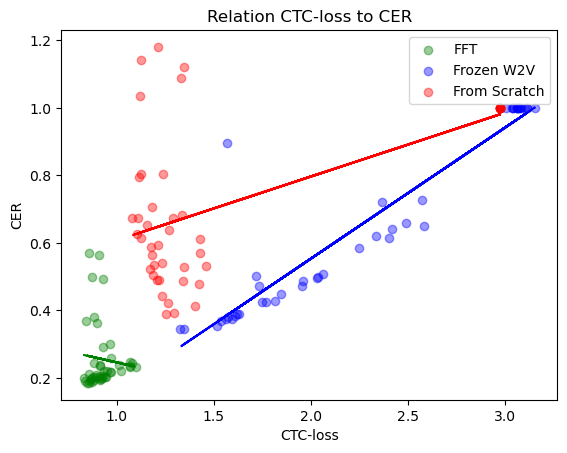

In [328]:
scatter_multiple_w_regression(
    [
        Series(
            joined["test_ctc_loss_fft"],
            joined["test_char_error_rate_rerun_fft"],
            "FFT",
            "green",
        ),
        Series(
            joined["test_ctc_loss_frozenw2v"],
            joined["test_char_error_rate_frozenw2v"],
            "Frozen W2V",
            "blue",
        ),
        Series(
            joined["test_ctc_loss_fromscratch"],
            joined["test_char_error_rate_rerun_fromscratch"],
            "From Scratch",
            "red",
        )
    ],
    "Relation CTC-loss to CER",
    "CTC-loss",
    "CER",
)

In [329]:
scatter_multiple_w_regression(
    [
        Series(
            joined["test_word_error_rate_rerun_fft"],
            joined["test_char_error_rate_rerun_fft"],
            "FFT",
            "green",
        ),
        Series(
            joined["test_ctc_loss_frozen2v"],
            joined["test_char_error_rate_frozen2v"],
            "Frozen W2V",
            "blue",
        ),
        Series(
            joined["test_word_error_rate_rerun_fromscratch"],
            joined["test_char_error_rate_rerun_fromscratch"],
            "From Scratch",
            "red",
        )
    ],
    "Relation WER to CER",
    "WER",
    "CER",
)

KeyError: 'test_ctc_loss_frozen2v'